In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pandas as pd
import time
from jieba import cut
from time import sleep
from pandas import DataFrame
from bs4 import BeautifulSoup
from selenium import webdriver
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
from scipy.misc import imread
import jieba

In [2]:
browser = webdriver.Chrome(executable_path='chromedriver')
browser.get("https://www.cupoy.com/newsfeed/topicgrp/tech_tw")
sleep(5)

In [3]:
count=1
article_title=[]
article_content=[]
article_category=[]
article_url=[]
article_content_list=[]
article_title_list=[]
article_category_list=[]
article_url_list=[]
updatetime_list=[]
while(count <= 500):
    html_source = browser.page_source
    soup = BeautifulSoup(html_source, "html5lib")

    for d in soup.find_all('div', class_="sc-eEieub sc-iuDHTM ibJqYc"):
        article_title=d.find('h6', class_="sc-erNlkL sc-ekulBa hDLssh").text
        article_content=d.find('p', class_="sc-FQuPU sc-ciodno bvnzOw").text
        article_category=d.find('div', class_="sc-gacfCG bPSpUf").text
        article_url=d.find('a').get('href')
        updatetime = d.find('span')
        #避免爬取到重複的文章
        if article_title not in article_title_list:
            article_content_list.append(article_content)
            article_title_list.append(article_title)
            article_category_list.append(article_category)
            article_url_list.append(article_url)
            updatetime_list.append(updatetime)
            count+=1
            #print(count)
        if count == 501:
            break
    
    sleep(0.5)
    browser.execute_script("window.scrollTo(0, 1000000);")
        
# 關閉瀏覽器
browser.quit();    
     

In [4]:
columnName = ['title','content','category','url','updatetime']

df = pd.DataFrame([article_title_list, article_content_list, article_category_list, article_url_list, updatetime_list])
df = df.T
df.columns = columnName
df

,title,content,category,url,updatetime
0,「悠遊付」App 即將上線，用手機就能「嗶」進捷運、搭公車等四大功能、上線時間搶先看 | T...,悠遊卡公司全新推出的電子支付「悠遊付」Easy Wallet App 即將全面啟動，只需綁定...,Fintech金融科技,https://technews.tw/2020/02/24/easy-wallet-app...,[9 小時前]
1,蘋果積極投入 5G 手機開發，AiP 模組將成為下一步關鍵 | TechNews 科技新報,市場上已有消息指出，手機大廠蘋果針對 5G 通訊領域，將於 2020 年 9 月推出首款 S...,蘋果專區,https://technews.tw/2020/02/24/apple-5g-aip/?u...,[13 小時前]
2,AI 發現能殺死高度抗藥性細菌的新抗生素,將 AI 應用在醫藥上，似乎取得了重大的成果。MIT 的科學家們宣佈發現了一種新的抗生素，取...,AI與大數據,https://chinese.engadget.com/chinese-2020-02-2...,[5 小時前]
3,蔡司技術加持，四鏡 Sony Xperia 1 II 要挑戰同門 A9 無反,好了，Sony 2020 年的新・旗艦手機終於登場了，一反外界的猜測，新機是名為 Xperi...,手機平板,https://chinese.engadget.com/chinese-2020-02-2...,[6 小時前]
4,企業轉型電商的第一道高牆！要學會哪些撇步才能跨越？｜數位時代,實體零售業者都想進軍電商接觸更大的客羣，但怎麼跨出第一步？松果購物董事長以多年實戰經驗，與讀...,電子商務,https://www.bnext.com.tw/article/56672/e-comme...,[3 小時前]
...,...,...,...,...,...
495,讀完本文，輕鬆玩轉數據處理利器Pandas 1.0 | 機器之心,2020 年 1 月 9 日 Pandas 1.0.0rc 版本面世，Facebook 數據...,AI與大數據,https://www.jiqizhixin.com/articles/2020-01-29-9,[2020/01/29]
496,推理速度提升29倍，參數少1/10，阿里提出AdaBERT壓縮方法 | 機器之心,本次介紹的是一項來自阿里巴巴的壓縮方案 AdaBERT。,AI與大數據,https://www.jiqizhixin.com/articles/2020-01-29-8,[2020/01/29]
497,25000個神經元，2000萬個突觸，谷歌等機構耗時十年重建突觸級果蠅半腦 | 機器之心,人類終於繪製出了最大的果蠅大腦連接圖，還精細到了突觸連接級別。,AI與大數據,https://www.jiqizhixin.com/articles/2020-01-29-7,[2020/01/29]
498,副業搞得大，不怕被優化：新春程序員優雅賺零花指南 | 機器之心,還想着靠內推掙個 iPad？做個項目、寫篇博客、做場諮詢、開個視頻，開發者的零花錢都是這樣來的。,AI與大數據,https://www.jiqizhixin.com/articles/2020-01-29-6,[2020/01/29]


In [5]:
allDict = dict(Counter(article_category_list))
                  
categoryDf = DataFrame(list(allDict.items()))
print(categoryDf)              

              0    1
0   Fintech金融科技   94
1          蘋果專區   13
2        AI與大數據  213
3          手機平板   14
4          電子商務    9
5          3C產品   17
6            創業    6
7         區塊鏈技術   21
8       APP應用程式   19
9            相機    1
10         社交媒體    4
11         無人駕駛    4
12         資訊安全   21
13     Google專區   14
14           理財    7
15         共享經濟    1
16           汽車    1
17         遊戲情報    3
18          物聯網    3
19        趨勢與策略    9
20           職涯    7
21         醫療健康    7
22           足球    1
23         美妝保養    2
24           美食    1
25           財經    5
26           旅遊    1
27           行銷    1
28           國際    1


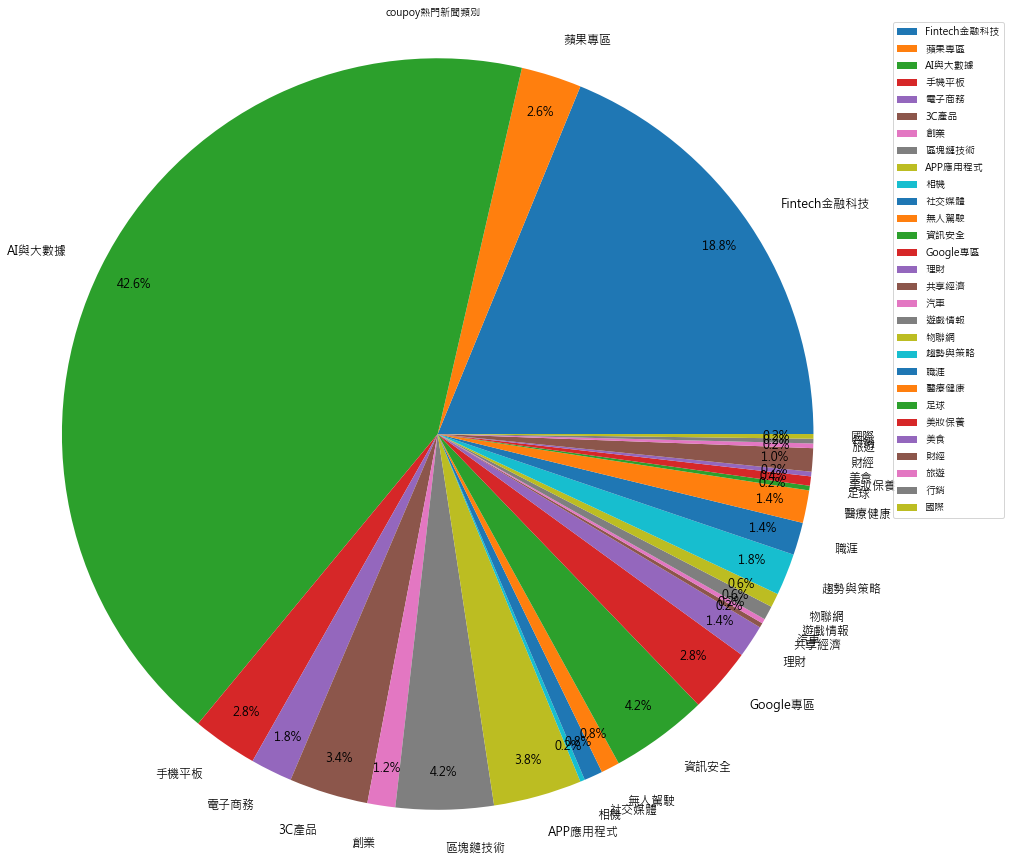

In [6]:
plt.figure(figsize=(15,15))    # 顯示圖框架大小

labels = categoryDf[0]     # 製作圓餅圖的類別標籤              # 依據類別數量，分別設定要突出的區塊
size = categoryDf[1]                         # 製作圓餅圖的數值來源
myfont = FontProperties(fname=r'\Users\chloe\Anaconda3\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\test-font.ttf')
plt.pie(size,                           # 數值
        labels = labels,                # 標籤
        autopct = "%1.1f%%",            # 將數值百分比並留到小數點一位
                   # 設定分隔的區塊位置
        pctdistance = 0.9,              # 數字距圓心的距離
        textprops = {"fontsize" : 12},  # 文字大小
        shadow=False)                    # 設定陰影

plt.axis('equal')                                          # 使圓餅圖比例相等
plt.title("coupoy熱門新聞類別", {"fontsize" : 25},fontproperties=myfont)  # 設定標題及其文字大小
plt.legend(loc = "best",bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)    # 設定圖例及其位置為最佳
plt.show()
plt.savefig("Pie chart of coupoy.jpg",   # 儲存圖檔
            bbox_inches='tight',               # 去除座標軸占用的空間
            pad_inches=0.0)                    # 去除所有白邊
plt.close()      # 關閉圖表

#https://ithelp.ithome.com.tw/articles/10202385

In [20]:
# 準備標題語料
titlegroups = ''
for title in article_title_list:
    titlegroups += title 
with open (r"stopwords.txt","r", encoding="utf-8") as stopfile:
    txt = stopfile.readlines()  # 一次性將所有的詞按行讀進來
    stopword = set(word.strip('\n') for word in txt)  # 去除每個詞後的換行符放入tuple中
#內容語料
contentgroups = ''
for content in article_content_list:
    contentgroups += content
#print(contentgroups)
with open(r"stopwords.txt","r",encoding='utf-8') as stopfile:  # 讀取停用詞，用utf-8的編碼格式
    txt = stopfile.readlines()  # 一次性將所有的詞按行讀進來
    stopword = set(word.strip('\n') for word in txt)  # 去除每個詞後的換行符放入tuple中
term_contentgroups = []
for word in cut(contentgroups): # 去除停用詞
    if word not in stopword:
        term_contentgroups.append(word)

contentCount = dict(Counter(term_contentgroups))
term_titlegroups = []
for word in cut(titlegroups): # 去除停用詞
    if word not in stopword:
        term_titlegroups.append(word)

titleCount = dict(Counter(term_titlegroups))

    
'''
with open('stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

#--------------------------------
# 讀入文件檔, 進行中文斷詞
#--------------------------------
with open('titleCorpus.txt', 'r', encoding='UTF-8') as file:
    #讀入文檔
    text = file.read()

    #結巴中文斷詞
    segments = jieba.cut(text, cut_all=False)
'''

"\nwith open('stopWords.txt', 'r', encoding='UTF-8') as file:\n    for data in file.readlines():\n        data = data.strip()\n        stopWords.append(data)\n\n#--------------------------------\n# 讀入文件檔, 進行中文斷詞\n#--------------------------------\nwith open('titleCorpus.txt', 'r', encoding='UTF-8') as file:\n    #讀入文檔\n    text = file.read()\n\n    #結巴中文斷詞\n    segments = jieba.cut(text, cut_all=False)\n"

C:\Users\chloe\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


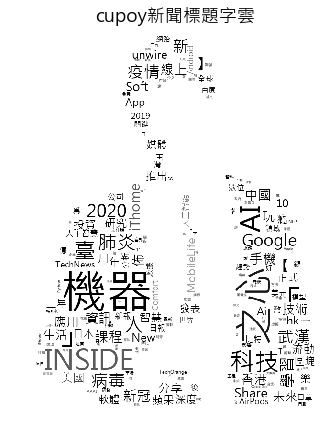

In [21]:
plt.figure(figsize=(7,7))
maskpic = imread("man.jpg")
wordcloud = WordCloud(background_color="white",mask=maskpic,font_path="TEST-FONT.TTF",width=1000, height=860, margin=2)#.generate(mytext)
wordcloud.generate_from_frequencies(frequencies = titleCount)
img_colors = ImageColorGenerator(maskpic)
wordcloud.recolor(color_func=img_colors)
# 顯示詞雲圖
plt.imshow(wordcloud)
plt.title('cupoy新聞標題字雲', fontsize = '18')
# 是否显示x轴、y轴下标
plt.axis('off')
plt.show()



C:\Users\chloe\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  import sys


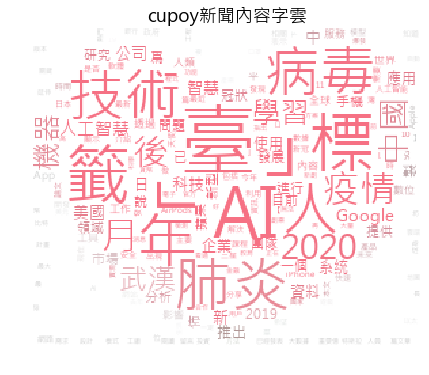

In [22]:
plt.figure(figsize=(7,7))
maskpic = imread("mask.png")
wordcloud = WordCloud(background_color="white",mask=maskpic,font_path="TEST-FONT.TTF",width=1000, height=860, margin=2)  #.generate(mytext)
wordcloud.generate_from_frequencies(frequencies = contentCount)
#改變字体颜色
img_colors = ImageColorGenerator(maskpic)
#字體顏色為背景圖片顏色
wordcloud.recolor(color_func=img_colors)
# 顯示詞雲圖
plt.imshow(wordcloud)
plt.title('cupoy新聞內容字雲', fontsize = '18')
# 是否顯示x轴、y轴下標
plt.axis('off')
plt.show()
plt.savefig("cupoy新聞內容字雲.jpg",   # 儲存圖檔
            bbox_inches='tight',               # 去除座標軸占用的空間
            pad_inches=0.0)                    # 去除所有白邊
plt.close()      # 關閉圖表

In [ ]:
#參考
#https://kknews.cc/zh-tw/education/o8ql3qo.html
#https://blog.csdn.net/fly910905/article/details/77763086
#https://www.jianshu.com/p/a53d780e9914